In [ ]:
import math
import pandas as pd
import numpy as np
import random
from collections import Counter
from copy import copy
import matplotlib.pyplot as plt

## Definiendo las funciones base

In [ ]:
def bestCasesGS(N):

  preferBS = []

  # Woman list
  preferW = [i+N for i in range(N)]
  for i in range(N):
    ax = preferW.pop(0)
    preferW.append(ax)
    preferBS.append(preferW[:])

  # Man list
  preferM = [i for i in range(N)]
  for i in range(N):
    ax = preferM.pop(0)
    preferM.append(ax)
    preferBS.append(preferM[:]) 
  return preferBS

def worstCaseGS(N):
  
  preferS = []
  
  # Woman list
  preferW = [i+N for i in range(N)]
  preferS.append(preferW[:])
  for i in range(N-1):
    listaux = preferW[1:N-1]
    elemaux = preferW[0]
    preferW[N-2] = elemaux
    preferW[0:N-2] = listaux[:]
    preferS.append(preferW[:])
  # Man list
  preferM = [i for i in range(N)]
  for i in range(N):
    ax = preferM.pop(0)
    preferM.append(ax)
    preferS.append(preferM[:])
  return preferS

def wPrefersM1OverM(prefer, woman, man, man1, n): 

  N = n
	# Check if w prefers m over her 
  for i in range(N):

		# If m1 comes before m in list of w, then w prefers her current engagement
    if (prefer[woman][i] == man1): 
      return True

		# If m comes before m1 in w's list, then free her current engagement
    if (prefer[woman][i] == man): 
      return False
  
def stableMarriage(prefer, n): 
  N = n
  
  # Indicates the partner of w
  wPartner = [-1 for i in range(N)] 

	# An array to store availability of men
  mFree = [False for i in range(N)] 

  freeCount = N 

  count = 0

	# While there are single men 
  while (freeCount > 0): 
    count += 1

		# First free man makes a proposal
    m = 0
    while (m < N): 
      if (mFree[m] == False): 
        break
      m += 1

    i = 0
    while i < N and mFree[m] == False: 
      w = prefer[m][i] 

			# The woman of preference is free, w and m get engagement
      if (wPartner[w - N] == -1): 
        wPartner[w - N] = m 
        mFree[m] = True
        freeCount -= 1

      else: 	
				# If w is not free, find current engagement of w 
        m1 = wPartner[w - N] 

				# If w prefers m over her current engagement m1, engage m with w. 
        if (wPrefersM1OverM(prefer, w, m, m1, N) == False): 
          wPartner[w - N] = m 
          mFree[m] = True
          mFree[m1] = False
      i += 1

	# Results
  print("Iteraciones: ", count)
  print("Mujeres ", " Hombres") 
  for i in range(N): 
    print(i + N, "----------", wPartner[i])

## **1.** Hallando peor y mejor caso para n = 4 y n = 40 

* Cuando $n=4$ :

Peor Caso
 

In [ ]:
stableMarriage(worstCaseGS(4), 4)

Iteraciones:  13
Mujeres   Hombres
4 ---------- 1
5 ---------- 2
6 ---------- 3
7 ---------- 0


*Mejor caso*

In [ ]:
stableMarriage(bestCasesGS(4), 4)

Iteraciones:  4
Mujeres   Hombres
4 ---------- 3
5 ---------- 0
6 ---------- 1
7 ---------- 2


* Cuando $n=40$:

*Peor caso*

In [ ]:
print("Worst case is: O(n) = n(n-1)+1 =", 40*(40-1)+1)
stableMarriage(worstCaseGS(40), 40)

Worst case is: O(n) = n(n-1)+1 = 1561
Iteraciones:  1561
Mujeres   Hombres
40 ---------- 1
41 ---------- 2
42 ---------- 3
43 ---------- 4
44 ---------- 5
45 ---------- 6
46 ---------- 7
47 ---------- 8
48 ---------- 9
49 ---------- 10
50 ---------- 11
51 ---------- 12
52 ---------- 13
53 ---------- 14
54 ---------- 15
55 ---------- 16
56 ---------- 17
57 ---------- 18
58 ---------- 19
59 ---------- 20
60 ---------- 21
61 ---------- 22
62 ---------- 23
63 ---------- 24
64 ---------- 25
65 ---------- 26
66 ---------- 27
67 ---------- 28
68 ---------- 29
69 ---------- 30
70 ---------- 31
71 ---------- 32
72 ---------- 33
73 ---------- 34
74 ---------- 35
75 ---------- 36
76 ---------- 37
77 ---------- 38
78 ---------- 39
79 ---------- 0


*Mejor caso*

In [ ]:
stableMarriage(bestCasesGS(40), 40)

Iteraciones:  40
Mujeres   Hombres
40 ---------- 39
41 ---------- 0
42 ---------- 1
43 ---------- 2
44 ---------- 3
45 ---------- 4
46 ---------- 5
47 ---------- 6
48 ---------- 7
49 ---------- 8
50 ---------- 9
51 ---------- 10
52 ---------- 11
53 ---------- 12
54 ---------- 13
55 ---------- 14
56 ---------- 15
57 ---------- 16
58 ---------- 17
59 ---------- 18
60 ---------- 19
61 ---------- 20
62 ---------- 21
63 ---------- 22
64 ---------- 23
65 ---------- 24
66 ---------- 25
67 ---------- 26
68 ---------- 27
69 ---------- 28
70 ---------- 29
71 ---------- 30
72 ---------- 31
73 ---------- 32
74 ---------- 33
75 ---------- 34
76 ---------- 35
77 ---------- 36
78 ---------- 37
79 ---------- 38


# **2.** Corriendo el algoritmo 100 veces par n= 4 y n = 40.

In [ ]:
def GaleShapley(n):

  step_count=[]
  
  # Gale-Sahpley Algoritm 100 times
  
  for t in range(100): 

    # Choosing man and woman
    man=[random.sample(list(range(1,n+1)),n) for i in range(n)]
    woman=[random.sample(list(range(1,n+1)),n) for i in range(n)]

    # Man's and woman's list
    man_list = list(range(1,n+1))
    woman_list = list(range(n+1,n*2+1))

    # For dataframes
    col=list(range(n+1,n*2+1))
    ind=list(range(1,n+1))

    # Woman's and man's dataframe
    woman_df = pd.DataFrame({col[i]:woman[i] for i in range(n)},index=ind) 
    man_df = pd.DataFrame(man,columns=col,index=ind) 

    # Available woman list
    woman_available = {man:woman_list for man in man_list}

    # Waiting list
    waiting_list = []

    # Proposal's amount
    proposals = {}
    count = 0

    # While there are single man
    while len(waiting_list) < len(man_list):

      for man in man_list:
        
        # For each men single a proposal is made
        if man not in waiting_list:
            
          women = woman_available[man]
          best_choice = man_df.loc[man][man_df.loc[man].index.isin(women)].idxmin()
          
          # Proposal's amount          
          proposals[(man, best_choice)]=(man_df.loc[man][best_choice],woman_df.loc[man][best_choice])

      overlays = Counter([key[1] for key in proposals.keys()])

      for women in overlays.keys():

        # For each women we see her proposal and take the optimal 
        if overlays[women] > 1:

          # Remove other m
          pairs_to_drop = sorted({pair: proposals[pair] for pair in proposals.keys() if women in pair}.items(), key=lambda x: x[1][1])[1:]

          # Remove w form available list
          for p_to_drop in pairs_to_drop:
            del proposals[p_to_drop[0]]
            _women = copy(woman_available[p_to_drop[0][0]])
            _women.remove(p_to_drop[0][1])
            woman_available[p_to_drop[0][0]] = _women

      waiting_list = [man[0] for man in proposals.keys()]

      count += 1

    step_count.append(count)

  # Plot the histogram
  plt.hist(step_count, bins=max(step_count)-min(step_count))
  plt.xlabel('Dias')
  plt.ylabel('Frecuencia')
  plt.title("Histograma")
  plt.show()
  print("Numero Maximo de dias: ",max(step_count))
  print("Numero Minimo de dias: ",min(step_count))
  print("Promedio de Dias: ",sum(step_count)/len(step_count))

* Cuando $n=4$:

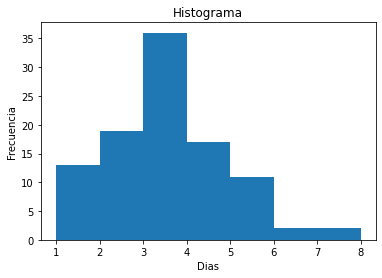

Numero Maximo de dias:  8
Numero Minimo de dias:  1
Promedio de Dias:  3.1


In [ ]:
GaleShapley(4)

* For $n=40$ we have:

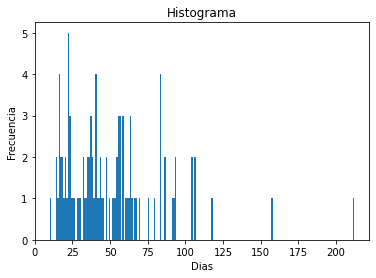

Numero Maximo de dias:  212
Numero Minimo de dias:  10
Promedio de Dias:  50.1


In [ ]:
GaleShapley(40)

# References

* Geeks and Geeks https://www.geeksforgeeks.org/stable-marriage-problem/